# **1. Perkenalan Dataset**


## Nama Dataset
Telecom Customer Churn Dataset

## Sumber Dataset
Dataset diperoleh dari Kaggle melalui tautan berikut:  
https://www.kaggle.com/datasets/barun2104/telecom-churn

## Ringkasan Dataset
Dataset Telecom Customer Churn digunakan untuk menganalisis perilaku pelanggan dalam layanan telekomunikasi, khususnya untuk memprediksi apakah seorang pelanggan akan berhenti berlangganan (*churn*) atau tidak.

Dataset ini terdiri dari 3333 data pelanggan dengan 11 kolom numerik. Variabel target adalah `Churn`, yang bernilai:
- 0 → pelanggan tidak berhenti berlangganan
- 1 → pelanggan berhenti berlangganan

Fitur-fitur dalam dataset mencakup informasi durasi berlangganan, penggunaan layanan, biaya bulanan, serta interaksi pelanggan dengan layanan pelanggan. Dataset ini umum digunakan untuk permasalahan klasifikasi biner dalam *machine learning*.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [59]:
df = pd.read_csv("../namadataset_raw/telecom_churn.csv")
print(df.head())


   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  


**4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [60]:
#Type your code here
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [61]:
df.shape

(3333, 11)

In [62]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [63]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

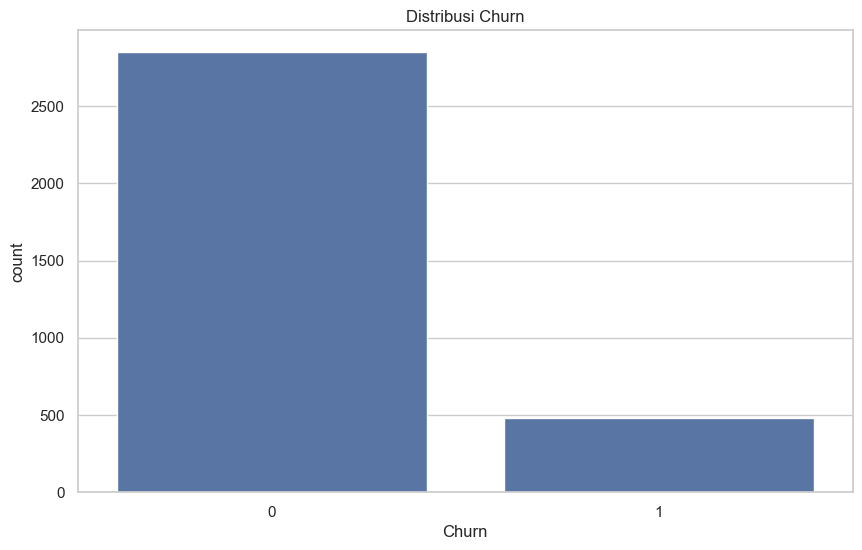

In [64]:
sns.countplot(x='Churn', data=df)
plt.title("Distribusi Churn")
plt.show()

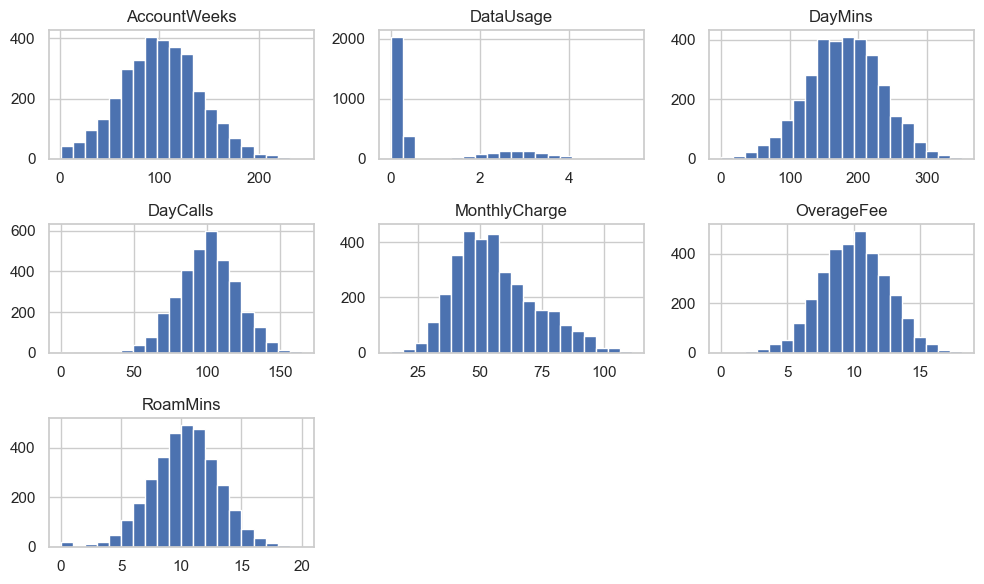

In [65]:
numerical_cols = [
    'AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge',
    'OverageFee', 'RoamMins'
]

df[numerical_cols].hist(bins=20)
plt.tight_layout()
plt.show()


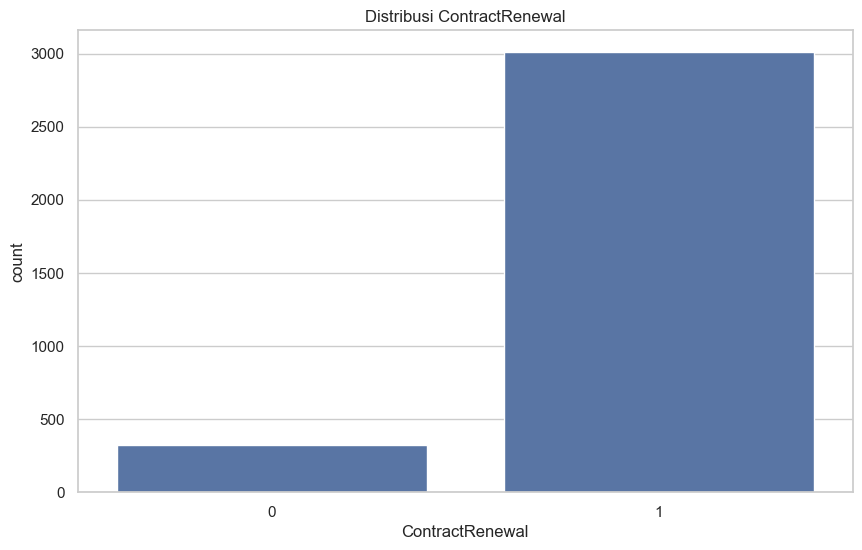

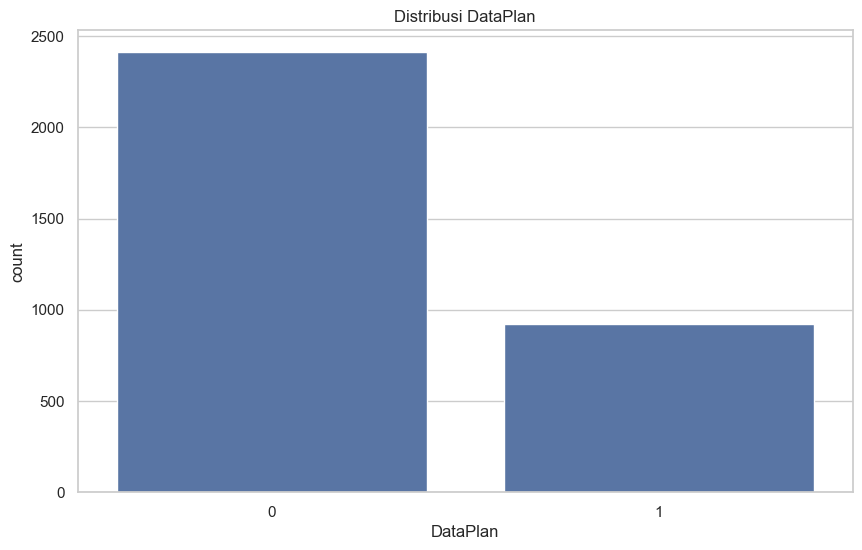

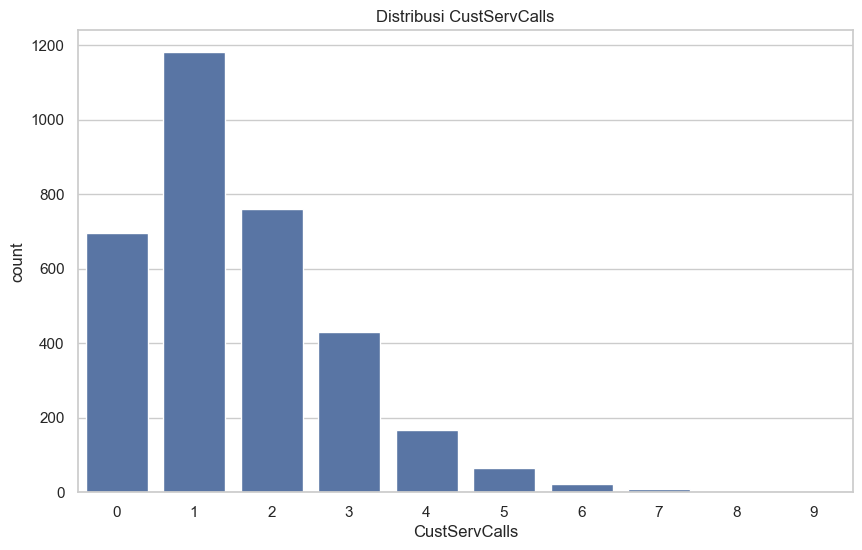

In [66]:
categorical_cols = ['ContractRenewal', 'DataPlan', 'CustServCalls']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.show()



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [67]:
df_processed = df.copy()


In [68]:
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(X.shape, y.shape)
print(y.isna().sum())


(3333, 10) (3333,)
0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (2666, 10)
Test : (667, 10)


In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [71]:
train_df = X_train_scaled.copy()
train_df['Churn'] = y_train.values

test_df = X_test_scaled.copy()
test_df['Churn'] = y_test.values


In [72]:
df_final = pd.concat([train_df, test_df], axis=0)


In [73]:
df_final.to_csv("telecom_churn_preprocessing.csv", index=False)
train_df.to_csv("telecom_churn_train.csv", index=False)
test_df.to_csv("telecom_churn_test.csv", index=False)

print("Semua file preprocessing berhasil disimpan")


Semua file preprocessing berhasil disimpan
